In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
import math
from scipy.optimize import minimize
from mpl_toolkits import mplot3d
from matplotlib import cm
from sklearn.metrics import mean_squared_error

from matplotlib import patheffects

import numpy.linalg as la
import pandas_datareader
import datetime
import pandas_datareader.data as web

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

3(a)
# Here we choose the start date and end date for stock price of Tesla
for last 30 days 

In [2]:
start=datetime.datetime(2022,10,22)
end=datetime.datetime(2022,11,21)
df=web.DataReader('TSLA','yahoo',start,end)

# Here we plot the tesla stock closing price 

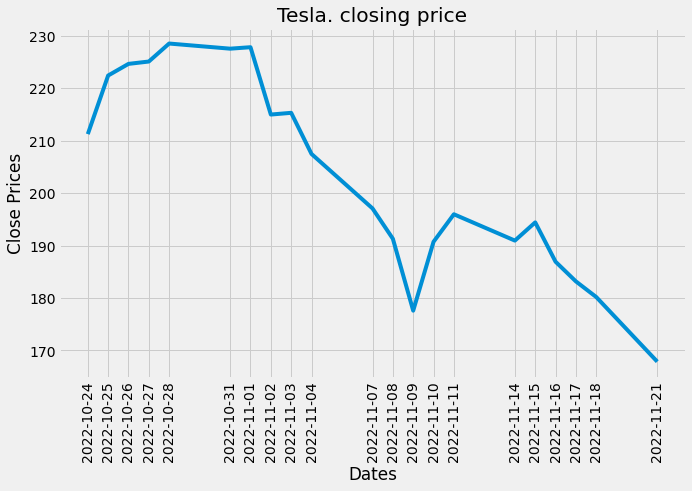

In [3]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(df['Close'])
plt.title('Tesla. closing price')
plt.xticks(df.index, rotation=90)
plt.show()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2022-10-24 to 2022-11-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       21 non-null     float64
 1   Low        21 non-null     float64
 2   Open       21 non-null     float64
 3   Close      21 non-null     float64
 4   Volume     21 non-null     int64  
 5   Adj Close  21 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 1.1 KB


# Here we drop the columns which are not required

In [5]:
df.drop(["Adj Close"], axis =1, inplace=True)
df.drop(['High', 'Low', 'Open', 'Volume'], axis=1, inplace=True)
df

,Close
Date,
2022-10-24,211.250000
2022-10-25,222.419998
2022-10-26,224.639999
2022-10-27,225.089996
2022-10-28,228.520004
2022-10-31,227.539993
2022-11-01,227.820007
2022-11-02,214.979996
2022-11-03,215.309998


## 3(b)

In [6]:
df = df.sort_index(ascending=True)
df['date'] = df.index.day
df['month'] = df.index.month


# Here we split data into train and training set

In [7]:
train_size = int(len(df) * 0.7)
test_size = len(df) - train_size
train, test = df[0:train_size], df[train_size:len(df)]
X_train = train[['date','month']]
X_test = test[['date','month']]
y_train = train['Close']
y_test = test['Close']
X = df[['date','month']]
y = df['Close']


## plotting train and test data

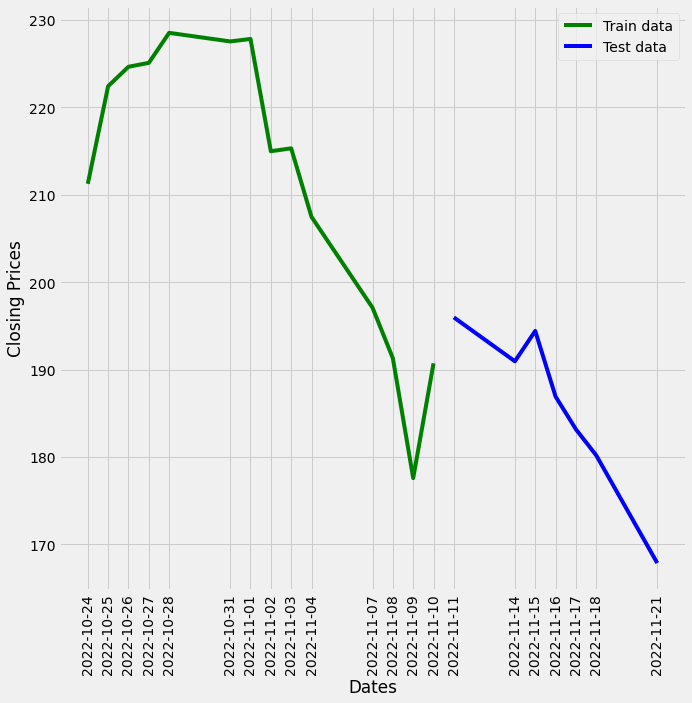

In [8]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(y_train, 'green', label='Train data')
plt.plot(y_test, 'blue', label='Test data')
plt.xticks(df.index, rotation=90)
plt.legend()
plt.show()

# Here we have scaled the input in the most convenient way using a pipeline.

In [76]:
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=500,tol=1e-3,validation_fraction=0.1,shuffle=False,verbose=2))
reg.fit(X,y)

-- Epoch 1
Norm: 5.58, NNZs: 2, Bias: 24.275764, T: 21, Avg. loss: 18566.314163
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 6.41, NNZs: 2, Bias: 39.562548, T: 42, Avg. loss: 14901.961590
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 6.92, NNZs: 2, Bias: 51.884005, T: 63, Avg. loss: 12594.233073
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 7.32, NNZs: 2, Bias: 62.377958, T: 84, Avg. loss: 10838.193631
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 7.67, NNZs: 2, Bias: 71.563132, T: 105, Avg. loss: 9431.758566
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 7.99, NNZs: 2, Bias: 79.738657, T: 126, Avg. loss: 8273.613969
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 8.30, NNZs: 2, Bias: 87.099639, T: 147, Avg. loss: 7302.514526
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 8.58, NNZs: 2, Bias: 93.783502, T: 168, Avg. loss: 6477.608862
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 8.86, NNZs: 2, Bias: 99.892270, T: 189, Avg. loss: 5769.914040


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor',
                 SGDRegressor(max_iter=500, shuffle=False, verbose=2))])

# This is the predicted value and mean squared error of the function 

In [77]:
y_pred=reg.predict(X)
mean_squared_error(y, y_pred)

70.16945393523108

# 3(c)
# Here we plot the Predicted data vs Actual data plot

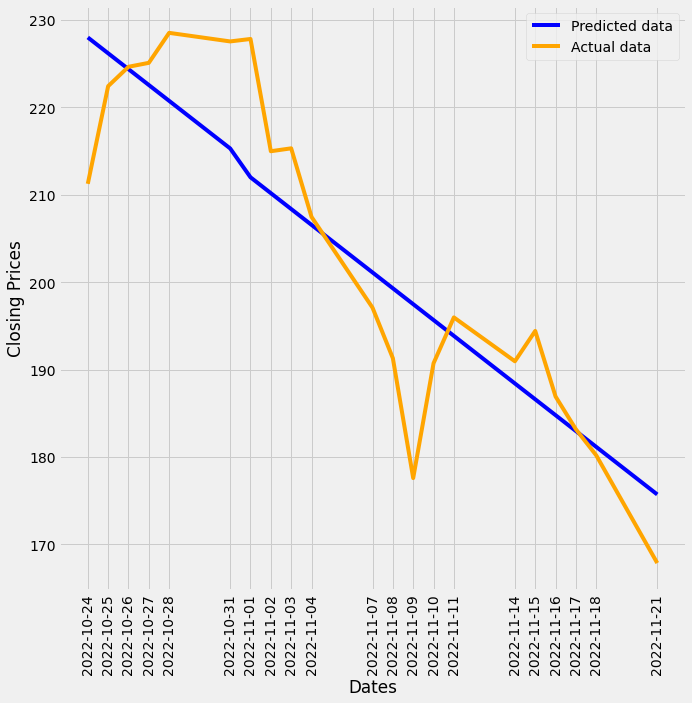

In [78]:
plt.figure(figsize=(10,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(y.index,y_pred, 'blue', label='Predicted data')
plt.plot(y.index,y, 'orange', label='Actual data')
plt.xticks(df.index, rotation=90)
plt.legend()
plt.show()

## 3(d)
## adding future dates for prediction

In [79]:
add_dates = [df.index[-1] +pd.tseries.offsets.BusinessDay(n = x) for x in range(0,66)]
future_dates = pd.DataFrame(index=add_dates[1:],columns=df.columns)
future_dates['date'] = future_dates.index.day
future_dates['month'] = future_dates.index.month


## adding future dates to dataframe 

In [80]:
fdf = df.append(future_dates)
fdf.describe()

,date,month
count,86.000000,86.000000
mean,15.616279,7.162791
std,9.008713,4.965435
min,1.000000,1.000000
25%,8.000000,1.250000
50%,15.500000,11.000000
75%,23.750000,11.750000
max,31.000000,12.000000


In [81]:
X_new = fdf[future_dates.index[0]:].drop(['Close'],axis=1)
X_new

,date,month
2022-11-22,22,11
2022-11-23,23,11
2022-11-24,24,11
2022-11-25,25,11
2022-11-28,28,11
...,...,...
2023-02-14,14,2
2023-02-15,15,2
2023-02-16,16,2
2023-02-17,17,2


# predicted values 

In [82]:
y_pred=reg.predict(X_new)
y_pred

array([173.90168992, 172.08763101, 170.27357209, 168.45951317,
       163.01733643, 161.20327751, 159.38921859, 154.2733369 ,
       152.45927799, 147.01710124, 145.20304232, 143.38898341,
       141.57492449, 139.76086558, 134.31868883, 132.50462991,
       130.690571  , 128.87651208, 127.06245316, 121.62027642,
       119.8062175 , 117.99215858, 116.17809967, 114.36404075,
       108.921864  , 107.10780509, 105.29374617, 103.47968726,
       101.66562834, 787.41877078, 785.60471186, 783.79065295,
       781.97659403, 780.16253511, 774.72035837, 772.90629945,
       771.09224054, 769.27818162, 767.4641227 , 762.02194596,
       760.20788704, 758.39382812, 756.57976921, 754.76571029,
       749.32353354, 747.50947463, 745.69541571, 743.8813568 ,
       742.06729788, 736.62512113, 734.81106222, 731.50923944,
       729.69518053, 727.88112161, 722.43894486, 720.62488595,
       718.81082703, 716.99676811, 715.1827092 , 709.74053245,
       707.92647353, 706.11241462, 704.2983557 , 702.48

# plotting final graph

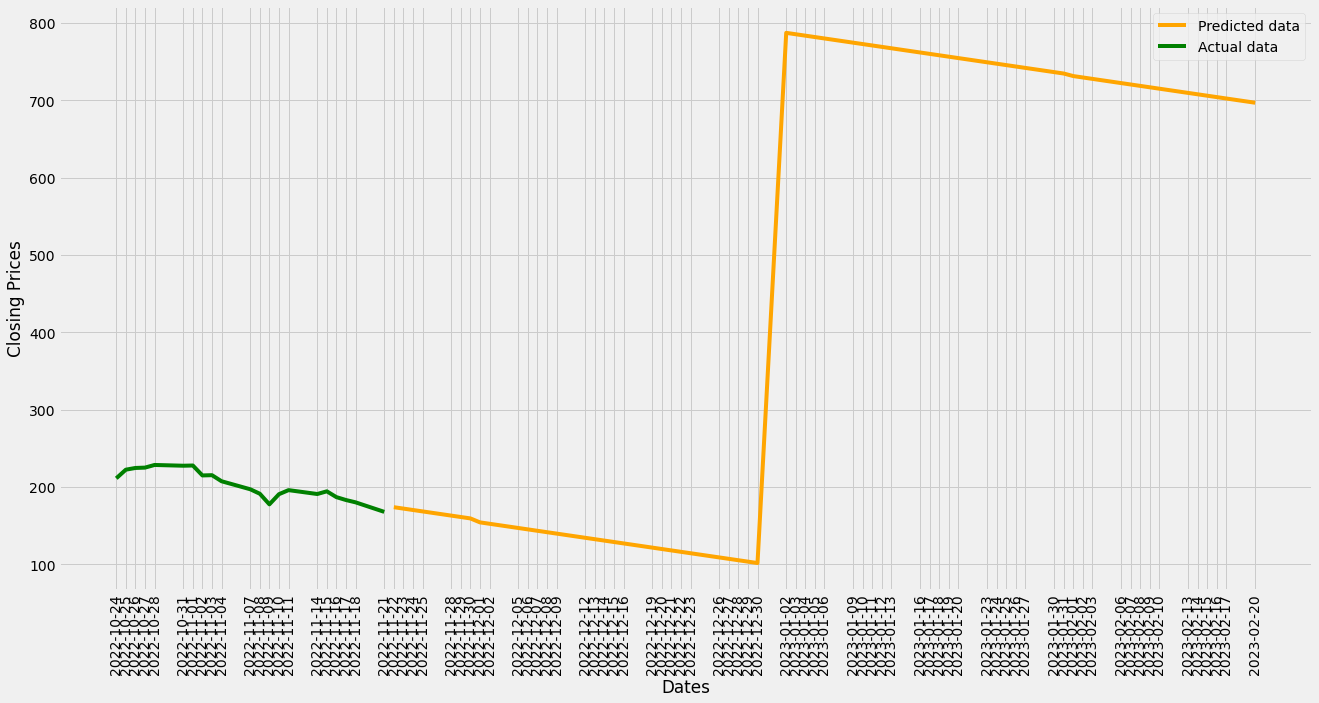

In [83]:
plt.figure(figsize=(20,10))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(X_new.index,y_pred, 'orange', label='Predicted data')
plt.plot(y.index,y, 'green', label='Actual data')
plt.xticks(fdf.index, rotation=90)
plt.legend()
plt.show()

## 3e

## Explain the pros and cons of gradient descent and stochastic gradient descent.

# For Gradient Descent:

## Pros :
1.Compared to stochastic gradient descent, convergence rate and error gradient are more stable for gradient descent.

2.A more direct, efficient, and straightforward method of computing minimum is used.

3.It has less of an impact from training dataset noise and outliers.

4.As it updates for a mini-batch gradient descent at every epoch, it learns more quickly.

5.Due to the fact that updates are needed after an epoch has run, it is computationally efficient.

6.brings about the advantages of vectorization

## Cons :
1.Local minima and saddle points are places where gradient descent can converge.

2.Slower learning since updates are only made after we have processed all observations

3.With a larger dataset, computation is more time consuming.

4.Having a large training dataset necessitates using a lot of memory.

# For Stochastic Gradient Descent:

## Pros :
1.It's simpler for the network to fit a single training example into memory as it processes it.

2.As parameters are updated more often for larger datasets, the convergence rate increases.

3.It is quicker computationally.

4.Oscillations are produced by frequent updates, and they are useful for emerging from local minima.

5.To escape the local minimums of the loss function, the stochastic gradient descent's loss function oscillates.

6.Since the network only needs to process one observation, it is simpler to store in memory.

## Cons :
1.Because of its chaotic convergence, it produces good results as opposed to ideal results.

2.Noise has great effect on Stochastic Gradient Descent

3.Frequent updates could lead to it going off course, and they are computationally expensive because they employ all available resources to execute one training sample at a time.

4.Frequent updates might make the minima noisy, which would frequently cause the gradient to descend in an opposite direction.
5.Longer convergence times to the loss function minima are caused by noisy steps.

6.Since only one observation is processed at a time, vectorization's advantages are lost.